# Combining Dataset

In [1]:
import pandas as pd
import os

# Path to the folder where your CSV files are located
directory = r"D:\Python\Final Project 2\Dataset"  # Replace with your actual folder path

# Create an empty list to store DataFrames
all_data = []

# Loop through all files in the specified directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check for CSV files
        file_path = os.path.join(directory, filename)
        try:
            # Read each CSV file into a DataFrame
            df = pd.read_csv(file_path)
            all_data.append(df)
            print(f"Successfully read {filename}")
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Check if any files were successfully read
if len(all_data) == 0:
    print("No CSV files were read. Please check your directory or file formats.")
else:
    # Combine all the DataFrames into a single DataFrame
    combined_data = pd.concat(all_data, ignore_index=True)

    # Convert 'time' to datetime temporarily for sorting
    if 'time' in combined_data.columns:
        combined_data['time_temp'] = pd.to_datetime(combined_data['time'])

        # Sort the data by the temporary 'time_temp' column
        combined_data = combined_data.sort_values(by='time_temp')

        # Drop the temporary 'time_temp' column to retain the original 'time' format
        combined_data = combined_data.drop(columns=['time_temp'])

    # Remove duplicate rows based on the 'id' column
    combined_data = combined_data.drop_duplicates(subset=['id'])

    # Save the combined data into a new CSV file
    output_file_path = r"combined_output.csv"
    combined_data.to_csv(output_file_path, index=False)

    print(f"All CSV files have been combined, sorted, and saved successfully into '{output_file_path}'.")


Successfully read query1950-72.csv
Successfully read query1973-77.csv
Successfully read query1978-82.csv
Successfully read query1983-86.csv
Successfully read query1987-90.csv
Successfully read query1991-94.csv
Successfully read query1995-96.csv
Successfully read query1997-98.csv
Successfully read query1999-00.csv
Successfully read query2001-02.csv
Successfully read query2003-04.csv
Successfully read query2005-06.csv
Successfully read query2007-08.csv
Successfully read query2009-10.csv
Successfully read query2011-12.csv
Successfully read query2013-14.csv
Successfully read query2015-16.csv
Successfully read query2017-18.csv
Successfully read query2019-20.csv
Successfully read query2021-22.csv
Successfully read query2023-24.csv
All CSV files have been combined, sorted, and saved successfully into 'combined_output.csv'.


# Import dataset

In [2]:
import pandas as pd

dataset_path = "combined_output.csv"
data= pd.read_csv(dataset_path)
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1950-01-02T15:14:37.960Z,-11.242,165.006,15.0,6.12,mw,NaN,NaN,NaN,NaN,...,2022-04-26T18:23:01.545Z,"103 km WSW of Lata, Solomon Islands",earthquake,NaN,8.6,0.41,NaN,reviewed,iscgem,iscgem
1,1950-01-03T02:51:55.410Z,17.533,121.447,30.0,6.50,mw,NaN,NaN,NaN,NaN,...,2022-04-26T18:23:07.394Z,"6 km NNW of Tabuk, Philippines",earthquake,NaN,3.8,0.34,NaN,reviewed,iscgem,iscgem
2,1950-01-03T11:06:28.640Z,-45.798,-77.077,15.0,6.27,mw,NaN,NaN,NaN,NaN,...,2022-04-26T18:23:08.483Z,"Off the coast of Aisen, Chile",earthquake,NaN,25.0,0.20,NaN,reviewed,iscgem,iscgem
3,1950-01-10T03:05:40.370Z,10.031,-103.964,15.0,6.10,mw,NaN,NaN,NaN,NaN,...,2022-04-26T18:23:14.340Z,northern East Pacific Rise,earthquake,NaN,25.0,0.20,NaN,reviewed,iscgem,iscgem
4,1950-01-14T19:52:30.000Z,40.217,-124.417,NaN,4.60,ml,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"35 km NW of Shelter Cove, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,brk


# Convert date time 1

In [3]:
# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract date and time as separate columns
data['date'] = data['time'].dt.date
data['time_only'] = data['time'].dt.time

# Display the updated dataframe with new columns
data[['time', 'date', 'time_only']].head()


,time,date,time_only
0,1950-01-02 15:14:37.960000+00:00,1950-01-02,15:14:37.960000
1,1950-01-03 02:51:55.410000+00:00,1950-01-03,02:51:55.410000
2,1950-01-03 11:06:28.640000+00:00,1950-01-03,11:06:28.640000
3,1950-01-10 03:05:40.370000+00:00,1950-01-10,03:05:40.370000
4,1950-01-14 19:52:30+00:00,1950-01-14,19:52:30


# Convert date time 2

In [4]:
# data['time'] = pd.to_datetime(data['time'], errors='coerce')
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data[['time', 'date', 'year','month', 'time_only']].head()

,time,date,year,month,time_only
0,1950-01-02 15:14:37.960000+00:00,1950-01-02,1950,1,15:14:37.960000
1,1950-01-03 02:51:55.410000+00:00,1950-01-03,1950,1,02:51:55.410000
2,1950-01-03 11:06:28.640000+00:00,1950-01-03,1950,1,11:06:28.640000
3,1950-01-10 03:05:40.370000+00:00,1950-01-10,1950,1,03:05:40.370000
4,1950-01-14 19:52:30+00:00,1950-01-14,1950,1,19:52:30


# Convert magtype into numbers

In [5]:
# Define a mapping for the magType column
magtype_mapping = {
    'md': 1,   # Example: 'md' -> 1
    'ml': 2,   # Example: 'ml' -> 2
    'mb': 3,   # Example: 'mb' -> 3
    'mw': 4,   # Example: 'mw' -> 4
    'mww': 5,
    'mwr': 6,
    'mb_lg': 7,
    'mh': 8,
    'mwc': 9,
    
    
    
    
    # Add other mappings as needed
}

# Map the magType column to numeric values
data['magType_numeric'] = data['magType'].map(magtype_mapping)

# Display the updated dataframe with the new column
data[['magType', 'magType_numeric']].head()

,magType,magType_numeric
0,mw,4.0
1,mw,4.0
2,mw,4.0
3,mw,4.0
4,ml,2.0


# Missing values

In [6]:
# Calculate the number of missing values per column
missing_values = data.isnull().sum()

# Display the columns with their corresponding missing value counts
print(missing_values)

time                    0
latitude                0
longitude               0
depth                 187
mag                     0
magType                 1
nst                180975
gap                130913
dmin               204151
rms                 40635
net                     0
id                      0
updated                 0
place                   0
type                    0
horizontalError    211244
depthError         135802
magError           197215
magNst              77613
status                  0
locationSource          0
magSource               0
date                    0
time_only               0
year                    0
month                   0
magType_numeric      7978
dtype: int64


In [7]:
# Calculate the percentage of missing values per column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Combine counts and percentages for a clearer view
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_summary)

                 Missing Values  Percentage (%)
time                          0        0.000000
latitude                      0        0.000000
longitude                     0        0.000000
depth                       187        0.065169
mag                           0        0.000000
magType                       1        0.000348
nst                      180975       63.069578
gap                      130913       45.623029
dmin                     204151       71.146387
rms                       40635       14.161250
net                           0        0.000000
id                            0        0.000000
updated                       0        0.000000
place                         0        0.000000
type                          0        0.000000
horizontalError          211244       73.618289
depthError               135802       47.326840
magError                 197215       68.729199
magNst                    77613       27.048041
status                        0        0

In [8]:
# Find unique values in the magType column
unique_magtypes = data['magType'].unique()
print(unique_magtypes)

['mw' 'ml' 'uk' 'fa' 'mh' 'ms' 'mb' 'md' 'lg' 'mwc' 'mb_lg' nan 'mc' 'ma'
 'm' 'mblg' 'mwb' 'mww' 'mwr' 'mlg' 'Md' 'Mb' 'Ml' 'ms_20' 'mlr' 'mwp'
 'ml(texnet)']


In [9]:
# Ensure all values in the "magType" column are lowercase
if 'magType' in data.columns:
    data['magType'] = data['magType'].str.lower()

# Display the updated unique values to verify
data['magType'].unique()


array(['mw', 'ml', 'uk', 'fa', 'mh', 'ms', 'mb', 'md', 'lg', 'mwc',
       'mb_lg', nan, 'mc', 'ma', 'm', 'mblg', 'mwb', 'mww', 'mwr', 'mlg',
       'ms_20', 'mlr', 'mwp', 'ml(texnet)'], dtype=object)

In [10]:
# Find unique values in the magType column
unique_magtypes = data['magType'].unique()
print(unique_magtypes)

['mw' 'ml' 'uk' 'fa' 'mh' 'ms' 'mb' 'md' 'lg' 'mwc' 'mb_lg' nan 'mc' 'ma'
 'm' 'mblg' 'mwb' 'mww' 'mwr' 'mlg' 'ms_20' 'mlr' 'mwp' 'ml(texnet)']


#  Handle the magType problem

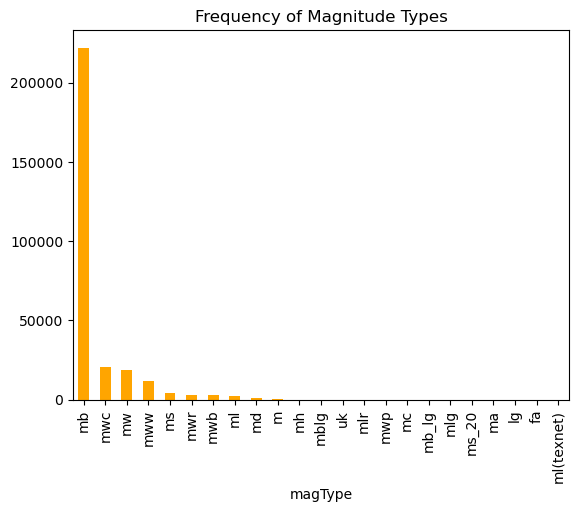

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pearsonr



# Magnitude Type Frequency
mag_types = data['magType'].value_counts()
mag_types.plot(kind='bar', color='orange')
plt.title("Frequency of Magnitude Types")
plt.show()

In [12]:
# Check the number of NaN values in the "magType" column
if 'magType' in data.columns:
    nan_count = data['magType'].isna().sum()
    print(f"Number of NaN values in 'magType' column: {nan_count}")
else:
    print("'magType' column not found in the dataset.")


Number of NaN values in 'magType' column: 1


In [13]:
# Find the row numbers where "magType" is NaN
if 'magType' in data.columns:
    nan_rows = data[data['magType'].isna()].index.tolist()
    print(f"Row numbers with NaN in 'magType': {nan_rows}")
else:
    print("'magType' column not found in the dataset.")


Row numbers with NaN in 'magType': [35617]


# Delete the nan value of magType row

In [14]:
# Remove rows where "magType" is NaN
if 'magType' in data.columns:
    data = data.dropna(subset=['magType']).reset_index(drop=True)
    print("Rows with NaN in 'magType' have been removed.")
else:
    print("'magType' column not found in the dataset.")

# Display the updated dataset's size
print(f"Updated dataset size: {data.shape}")


Rows with NaN in 'magType' have been removed.
Updated dataset size: (286944, 27)


# check again

In [15]:
# Check the number of NaN values in the "magType" column
if 'magType' in data.columns:
    nan_count = data['magType'].isna().sum()
    print(f"Number of NaN values in 'magType' column: {nan_count}")
else:
    print("'magType' column not found in the dataset.")


Number of NaN values in 'magType' column: 0


# Convert magType into numbers

In [16]:
# Find unique values in the magType column
unique_magtypes = data['magType'].unique()
print(unique_magtypes)

['mw' 'ml' 'uk' 'fa' 'mh' 'ms' 'mb' 'md' 'lg' 'mwc' 'mb_lg' 'mc' 'ma' 'm'
 'mblg' 'mwb' 'mww' 'mwr' 'mlg' 'ms_20' 'mlr' 'mwp' 'ml(texnet)']


In [17]:
# Define a mapping for the magType column
magtype_mapping = {
    'mw' : 1,
    'ml' : 2,
    'mh' : 3,
    'ms' : 4,
    'mb' : 5,
    'md' : 6,
    'lg' : 7,
    'mwc' : 8,
    'mb_lg' : 9,
    'mc' : 10,
    'ma' : 11,
    'm' : 12,
    'mblg' : 13,
    'mwb' : 14,
    'mww' : 15,
    'mwr' : 16,
    'mlg' : 17,
    'ms_20' : 18,
    'mlr' : 19,
    'mwp' : 20,
    'ml(texnet)' : 21,
    'uk' : 22,
    'fa' : 23
    
    
    
    # Add other mappings as needed
}

# Map the magType column to numeric values
data['magType_numeric'] = data['magType'].map(magtype_mapping)

# Display the updated dataframe with the new column
data[['magType', 'magType_numeric']].head()

,magType,magType_numeric
0,mw,1
1,mw,1
2,mw,1
3,mw,1
4,ml,2


In [18]:
# Save the processed DataFrame to a new CSV file
output_file_path = 'processed_data.csv'
data.to_csv(output_file_path, index=False)

# Print confirmation
print(f"Processed data saved to: {output_file_path}")

PermissionError: [Errno 13] Permission denied: 'processed_data.csv'

In [ ]:

# Perform one-hot encoding on the 'magType' column with 0/1 binary values
magType_one_hot = pd.get_dummies(data['magType'], prefix='magType').astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
data1 = pd.concat([data, magType_one_hot], axis=1)

# Save the updated dataset to a new file
updated_file_path = 'processed_data magType.csv'
data1.to_csv(updated_file_path, index=False)

print(f"Processed data saved to {updated_file_path}")


# Rechack

In [ ]:
# Calculate the number of missing values per column
missing_values = data.isnull().sum()

# Display the columns with their corresponding missing value counts
print(missing_values)

In [ ]:
# Calculate the percentage of missing values per column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Combine counts and percentages for a clearer view
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_summary)

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
file_path = 'processed_data magType.csv'
df = pd.read_csv(file_path)

# Impute depth using regional averages based on latitude, longitude, and magType
if 'depth' in df.columns:
    df['depth'] = df.groupby(['latitude', 'longitude', 'magType'])['depth'].transform(
        lambda x: x.fillna(x.mean())
    )

# Fallback: Impute remaining depth values using overall mean
df['depth'].fillna(df['depth'].mean(), inplace=True)

# Impute RMS using averages grouped by event type
if 'rms' in df.columns and 'type' in df.columns:
    df['rms'] = df.groupby('type')['rms'].transform(lambda x: x.fillna(x.mean()))

# Fallback: Impute remaining RMS values using overall mean
df['rms'].fillna(df['rms'].mean(), inplace=True)

# Drop irrelevant columns
irrelevant_columns = ['id', 'status', 'net']
df.drop(columns=irrelevant_columns, inplace=True)

# Remove duplicate entries
df.drop_duplicates(inplace=True)

# Handle outliers in geospatial data
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]


# Feature Engineering

In [19]:
import pandas as pd
import numpy as np

# Temporal Features
try:
    df['time'] = pd.to_datetime(df['time'], format='ISO8601', errors='coerce')  # Ensure robust parsing
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour
except Exception as e:
    print(f"Error in datetime conversion: {e}")

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

if 'month' in df.columns:
    df['season'] = df['month'].apply(get_season)

# Encoding magType using one-hot encoding
if 'magType' in df.columns:
    df_encoded = pd.get_dummies(df['magType'], prefix='magType')
    df = pd.concat([df, df_encoded], axis=1)
    df.drop(columns=['magType'], inplace=True)

# Error Metrics: Create combined error metrics
if 'horizontalError' in df.columns and 'depthError' in df.columns:
    df['combinedError'] = df[['horizontalError', 'depthError']].mean(axis=1, skipna=True)

# Geospatial Feature: Proximity to tectonic plate boundaries (mock example)
def calculate_proximity(lat, lon, boundary_lat, boundary_lon):
    """Calculate approximate distance from a point to a tectonic plate boundary."""
    return np.sqrt((lat - boundary_lat)**2 + (lon - boundary_lon)**2)  # Placeholder, not real distance

# Example tectonic boundary coordinates (replace with real data if available)
tectonic_boundary_lat, tectonic_boundary_lon = 10.0, 20.0

if 'latitude' in df.columns and 'longitude' in df.columns:
    df['proximity_to_boundary'] = df.apply(
        lambda row: calculate_proximity(
            row['latitude'], row['longitude'], tectonic_boundary_lat, tectonic_boundary_lon
        ),
        axis=1
    )
print("Done")

Done


# Data Normalization/Scaling

In [20]:
# Scale numerical features
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'rms']

# Standardization (Z-score scaling)
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Or Min-Max Scaling
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Done")

NameError: name 'StandardScaler' is not defined